In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw

In [43]:
import pandas as pd
file = 'all_data.csv'
dataframe = pd.read_csv(file, index_col=0)
dataframe.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [44]:
dataframe = dataframe[dataframe['Order Date'].str[0:2] != 'Or']


In [45]:
nan_df = dataframe[dataframe.isna().any(axis=1)]
dataframe = dataframe.dropna(how='all')
dataframe.head()
# Dropa quaquer valor NaN na tabela

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [46]:
dataframe['Quantity Ordered'] = pd.to_numeric(dataframe['Quantity Ordered'])
dataframe['Price Each'] = pd.to_numeric(dataframe['Price Each'])
dataframe.head()
# Converte as colunas para o tipo corrreto


,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [47]:
dataframe['Sales'] = dataframe['Quantity Ordered'] * dataframe['Price Each']
dataframe.head(10)
# Criando a coluna Sales e multiplica a coluna de Quantity Ordered por Price Each

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Order ID,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95
295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",3.84
295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",11.95
295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",23.90
295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",99.99


In [48]:
dataframe['Month'] = dataframe['Order Date'].str[0:2]
dataframe['Month'] = dataframe['Month'].astype('Int32')
dataframe.head()
# adicionando a coluna Month ao dataframe

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
Order ID,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12


In [49]:
# Adicionando a coluna Cities
def get_city(address):
    return address.split(',')[1].strip()


def get_state(address):
    return address.split(',')[2].strip().split(' ')[0]


dataframe['Cities'] = dataframe['Purchase Address'].apply(
    lambda x: f'{get_city(x)} ({get_state(x)})')
dataframe.head()


,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Cities
Order ID,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY)
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY)
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY)
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA)
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA)


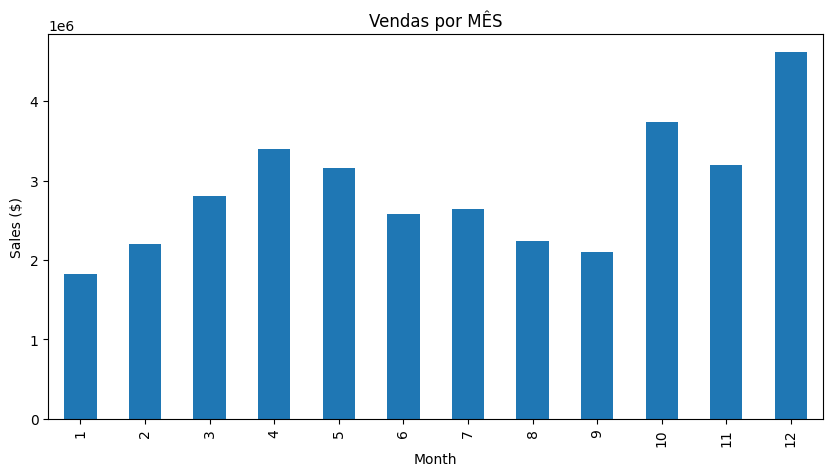

In [50]:
ax = dataframe.groupby(['Month']).sum()['Sales'].plot(kind='bar', figsize=(10, 5))
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.title('Vendas por MÊS')

plt.show()
# Plotando os dados

In [51]:
wid_city = ipw.Dropdown(name='Cities')


In [52]:
wid_city.options = list(dataframe.Cities.unique())

In [53]:
wid_city

Dropdown(options=('New York City (NY)', 'San Francisco (CA)', 'Atlanta (GA)', 'Portland (OR)', 'Dallas (TX)', …

interactive(children=(Dropdown(description='city', options=('New York City (NY)', 'San Francisco (CA)', 'Atlan…

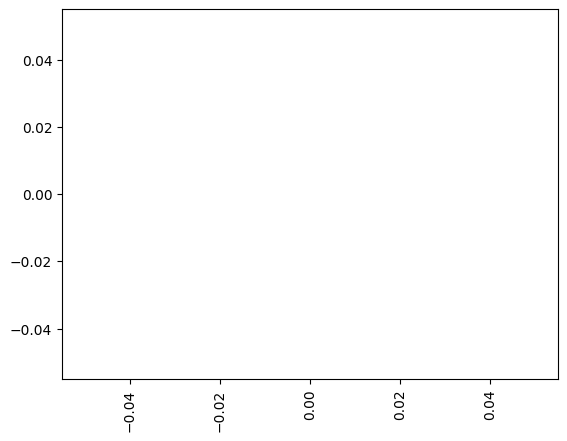

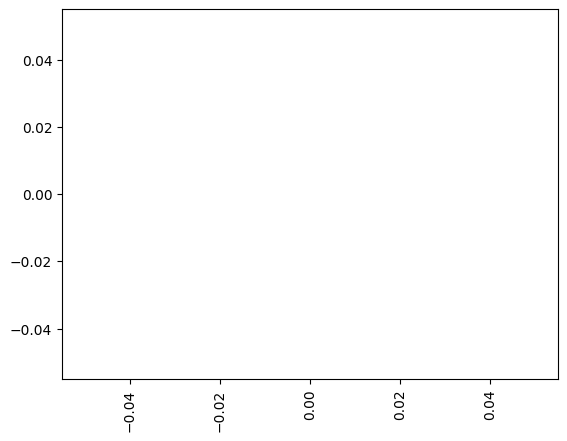

In [57]:
wid_city = ipw.Dropdown(name='city')
wid_city.options = list(dataframe.Cities.unique())

wid_product = ipw.Dropdown(name='product')
wid_product.options = list(dataframe.Product.unique())

def func(city, product):
    df_tmp = dataframe[dataframe['Cities'] == wid_city.value].copy()
    df_tmp = df_tmp[df_tmp['Product'] == wid_product.value]
    
    ax = df_tmp.groupby(['Month']).sum()['Sales'].plot(kind='bar')
    plt.ylabel('Sales ($)')
    plt.xlabel('Month')
    
    plt.show()
    

interactive_plot = ipw.interactive(func, city=wid_city, product=wid_product)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
